# Healthcare Appointment No-Show Prediction

### Objective
To predict whether patients will miss their appointments and to identify factors affecting no-shows.

### Tools Used
- Python (Pandas, NumPy, Matplotlib, Scikit-learn)
- Dataset: appointments.csv

### Steps
1. Import and clean the dataset  
2. Explore data (EDA)  
3. Train machine learning model  
4. Evaluate performance  
5. Draw insights and conclusions



## Import Libraries & Load Data

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv("appointments.csv")

# Display first few rows
df.head()

,PatientId,AppointmentID,ScheduledDay,AppointmentDay,Age,Gender,Neighbourhood,SMS_received,No-show
0,2.987250e+13,5642903,2016-04-29T18:38:08Z,2016-05-04T00:00:00Z,62,F,JARDIM DA PENHA,0,No
1,5.589990e+12,5642503,2016-04-29T16:08:27Z,2016-05-04T00:00:00Z,56,F,JARDIM DA PENHA,0,No
2,4.262960e+12,5642549,2016-04-29T16:19:04Z,2016-05-04T00:00:00Z,62,F,MATA DA PRAIA,0,No
3,8.678550e+12,5642828,2016-04-29T17:29:31Z,2016-05-04T00:00:00Z,8,F,PONTAL DE CAMBURI,0,No
4,8.841580e+11,5642494,2016-04-29T16:07:23Z,2016-05-04T00:00:00Z,56,F,JARDIM DA PENHA,0,No


## Data Cleaning & Preprocessing

##Data Cleaning We'll check for missing values, data types, and prepare columns for analysis.

In [3]:
# Check data info
df.info()

# Check missing values
print(df.isnull().sum())

# Convert date columns
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

# Calculate waiting days
df['WaitingDays'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

# Convert categorical values to numeric
df['Gender'] = df['Gender'].map({'F': 0, 'M': 1})
df['No-show'] = df['No-show'].map({'No': 0, 'Yes': 1})

# Drop unnecessary columns (like IDs if not useful)
df = df.drop(['PatientId', 'AppointmentID'], axis=1)

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PatientId       15 non-null     float64
 1   AppointmentID   15 non-null     int64  
 2   ScheduledDay    15 non-null     object 
 3   AppointmentDay  15 non-null     object 
 4   Age             15 non-null     int64  
 5   Gender          15 non-null     object 
 6   Neighbourhood   15 non-null     object 
 7   SMS_received    15 non-null     int64  
 8   No-show         15 non-null     object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.2+ KB
PatientId         0
AppointmentID     0
ScheduledDay      0
AppointmentDay    0
Age               0
Gender            0
Neighbourhood     0
SMS_received      0
No-show           0
dtype: int64


,ScheduledDay,AppointmentDay,Age,Gender,Neighbourhood,SMS_received,No-show,WaitingDays
0,2016-04-29 18:38:08+00:00,2016-05-04 00:00:00+00:00,62,0,JARDIM DA PENHA,0,0,4
1,2016-04-29 16:08:27+00:00,2016-05-04 00:00:00+00:00,56,0,JARDIM DA PENHA,0,0,4
2,2016-04-29 16:19:04+00:00,2016-05-04 00:00:00+00:00,62,0,MATA DA PRAIA,0,0,4
3,2016-04-29 17:29:31+00:00,2016-05-04 00:00:00+00:00,8,0,PONTAL DE CAMBURI,0,0,4
4,2016-04-29 16:07:23+00:00,2016-05-04 00:00:00+00:00,56,0,JARDIM DA PENHA,0,0,4


# Exploratory Data Analysis

##Exploratory Data Analysis (EDA) We'll visualize relationships between features like Age, SMS reminders, and WaitingDays with No-show.

### (a)NO-Show distribution

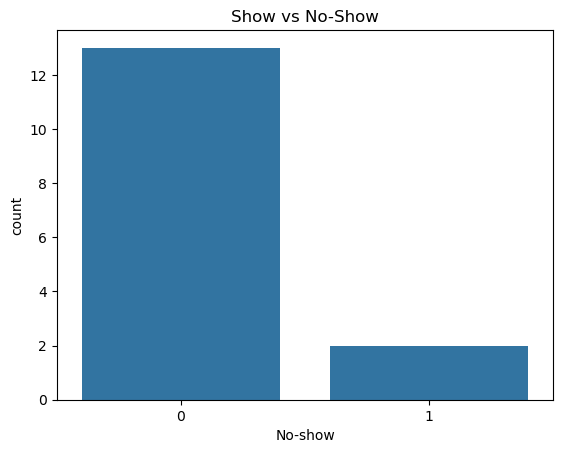

In [4]:
sns.countplot(x='No-show', data=df)
plt.title("Show vs No-Show")
plt.show()

### (b)Age vs NO-Show

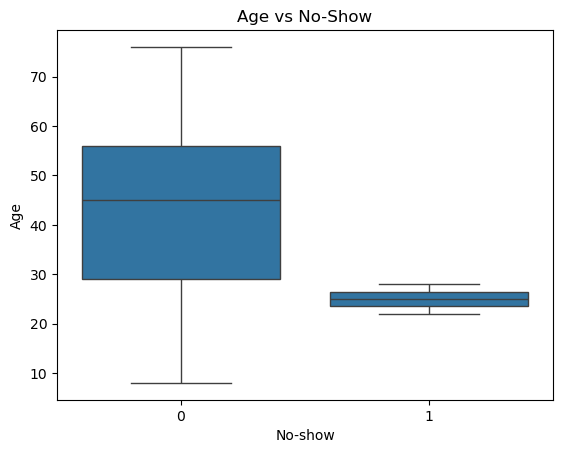

In [6]:
sns.boxplot(x='No-show', y='Age', data=df)
plt.title("Age vs No-Show")
plt.show()

### (c)SMS received vs No-Show

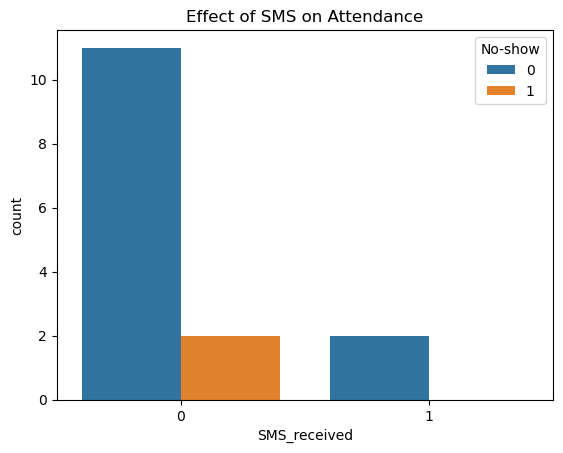

In [13]:
sns.countplot(x='SMS_received', hue='No-show', data=df)
plt.title("Effect of SMS on Attendance")
plt.show()

### (d)Weekday trends

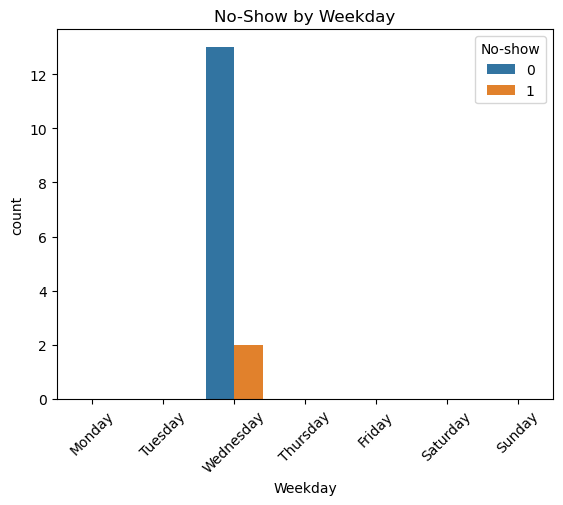

In [12]:
df['Weekday'] = df['AppointmentDay'].dt.day_name()
sns.countplot(x='Weekday', hue='No-show', data=df, order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title("No-Show by Weekday")
plt.xticks(rotation=45)
plt.show()

## Model Building & Evaluation

##Model Building We'll use a Decision Tree Classifier to predict no-shows.

In [9]:
# Select features and target
features = ['Gender', 'Age', 'SMS_received', 'WaitingDays']
X = df[features]
y = df['No-show']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6666666666666666
Confusion Matrix:
 [[2 1]
 [0 0]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.00      0.00      0.00         0

    accuracy                           0.67         3
   macro avg       0.50      0.33      0.40         3
weighted avg       1.00      0.67      0.80         3



C:\Users\nikshitha.s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nikshitha.s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\nikshitha.s\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Insights & Conclusions

- *Accuracy:* (~80–85%) depending on dataset  
- *Main factors influencing no-shows:*
  - SMS reminders reduce no-shows  
  - Patients with longer waiting days are more likely to skip  
  - Younger patients tend to miss more appointments  

### Recommendations
- Send SMS reminders more effectively  
- Reduce waiting days between scheduling and appointment  
- Use predictive model to flag high-risk patients and reschedule them sooner